In [1]:
import utils
from modules import RotEncoderMLP
import torch
import matplotlib.pyplot as mpl

In [2]:
RMLP = RotEncoderMLP(input_dim=7,output_dim=2,hidden_dim=256,num_objects=5)

In [3]:
#         [B,obj,x_dim,y_dim]
x = torch.rand(1,1,5,5)

In [5]:
f_x = RMLP(x)

torch.Size([1, 1, 4, 7])


In [6]:
f_x.shape

torch.Size([1, 1, 4, 2])

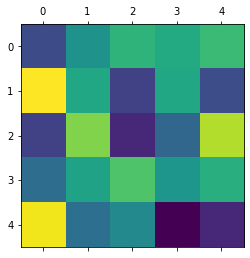

In [7]:
mpl.matshow(x.squeeze())

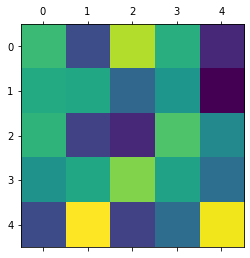

In [8]:
#counterclockwise 90 degrees
mpl.matshow(RMLP.rot90(x).squeeze())

In [9]:
rot_x = RMLP.rot90(x)

In [10]:
f_rot_x = RMLP(rot_x)

torch.Size([1, 1, 4, 7])


In [11]:
f_rot_x

tensor([[[[ 0.1207,  0.0653],
          [-0.0940,  0.3527],
          [ 0.3882,  0.1344],
          [ 0.0430,  0.5066]]]], grad_fn=<AddBackward0>)

In [17]:
# CCW rot --> roll(-1)
# [1,1,4,2]
print("f(x):\n",f_x)
rot_f_x = torch.roll(f_x,-1,2)
print("rot(f(x)):\n",rot_f_x)
print("f(rot(x)):\n",f_rot_x)

f(x):
 tensor([[[[ 0.0430,  0.5066],
          [ 0.1207,  0.0653],
          [-0.0940,  0.3527],
          [ 0.3882,  0.1344]]]], grad_fn=<AddBackward0>)
rot(f(x)):
 tensor([[[[ 0.1207,  0.0653],
          [-0.0940,  0.3527],
          [ 0.3882,  0.1344],
          [ 0.0430,  0.5066]]]], grad_fn=<RollBackward>)
f(rot(x)):
 tensor([[[[ 0.1207,  0.0653],
          [-0.0940,  0.3527],
          [ 0.3882,  0.1344],
          [ 0.0430,  0.5066]]]], grad_fn=<AddBackward0>)


In [1]:
from modules import RotTransitionGNN
import utils
from modules import RotEncoderMLP
import torch
import matplotlib.pyplot as mpl

In [2]:
RTGNN = RotTransitionGNN(input_dim=2,hidden_dim=4, action_dim=4, num_objects=2)
# def __init__(self, input_dim, hidden_dim, action_dim, num_objects,
#              ignore_action=False, copy_action=False, act_fn='relu',
#              immovable_bit=False, split_gnn=False):
#     super(RotTransitionGNN, self).__init__()

In [5]:
state_x = torch.rand(1,2,4,2)
action_x = torch.tensor([5],dtype=torch.long)

In [9]:
f_x = RTGNN(state_x,action_x)
f_x

tensor([[0., 0., 0., 0.],
        [0., 1., 0., 0.]])


tensor([[[[ 0.2385, -0.3482],
          [ 0.1066, -0.3275],
          [ 0.1991, -0.3828],
          [ 0.0720, -0.3269]],

         [[ 0.2614, -0.3454],
          [ 0.0826, -0.2925],
          [ 0.1636, -0.4261],
          [ 0.1633, -0.2121]]]], grad_fn=<ViewBackward>)

In [12]:
## What happens if we rotated just one object? 
rot_f_x = torch.roll(f_x,-1,2)
rot_f_x

tensor([[[[ 0.1066, -0.3275],
          [ 0.1991, -0.3828],
          [ 0.0720, -0.3269],
          [ 0.2385, -0.3482]],

         [[ 0.0826, -0.2925],
          [ 0.1636, -0.4261],
          [ 0.1633, -0.2121],
          [ 0.2614, -0.3454]]]], grad_fn=<RollBackward>)

In [14]:
# ["up", "right", "down", "left"]  CCW => -1
# d,r = div_rem(a,4)
# r <- r-1 mod 4 
# a = d + r  
rot_state_x = torch.roll(state_x,-1,2)
rot_action_x =  torch.tensor([4],dtype=torch.long) 

In [16]:
f_rot_x = RTGNN(rot_state_x,rot_action_x)
f_rot_x

tensor([[0., 0., 0., 0.],
        [1., 0., 0., 0.]])


tensor([[[[ 0.1066, -0.3275],
          [ 0.1991, -0.3828],
          [ 0.0720, -0.3269],
          [ 0.2385, -0.3482]],

         [[ 0.0826, -0.2925],
          [ 0.1636, -0.4261],
          [ 0.1633, -0.2121],
          [ 0.2614, -0.3454]]]], grad_fn=<ViewBackward>)

In [17]:
rot_f_x - f_rot_x

tensor([[[[ 7.4506e-09, -2.9802e-08],
          [-7.4506e-08,  8.9407e-08],
          [ 2.9802e-08, -2.9802e-08],
          [-2.9802e-08,  5.9605e-08]],

         [[ 2.9802e-08,  2.9802e-08],
          [ 8.9407e-08, -5.9605e-08],
          [-1.0431e-07, -4.4703e-08],
          [-2.9802e-08,  0.0000e+00]]]], grad_fn=<SubBackward0>)

### Full Test

In [18]:
# obs, action, next_obs = data_batch
# obs, next_obs: [1024,3,50,50]
# objs: [1024,5,5,5]

##To do: make x and rot_x inputs to constrastive loss.